__Goal : To find if fraud is made or not__

In the datasets like fraud detection, customer churn, device failure, disease prediction the dataset is always imbalanced.
The rate of fraud, customer churn, device failure, diseased patients is usually low. So when such dataset is provided for training-
The training data provided contains very less value of such particular class. So model doesn't have much to learn from it.There is a huge bias in the dataset which should be solved to get the exact predictions.

1. Step1: Initially solving using unbalanced dataset (Logistic Regression to check for performance)

2. Step2: Later solving using balanced dataset using different balancing methods and hyper parameter tuning.
    
        1.using OVERSAMPLING
        
3. Step3:  Selecting the best model from hyper parameter tuning scores to train the model.Freezing the model using Joblib for further predictions. Pipelines can be created and model can be deployed using flask/django.


__Importing libraries and csv__

In [80]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Fraud.csv')
df.shape

(6362620, 11)

In [3]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


## Data Exploration

In [4]:
df.isnull().sum() ##checking null values in dataframe

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrg'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>,
        <AxesSubplot:title={'center':'isFlaggedFraud'}>, <AxesSubplot:>]],
      dtype=object)

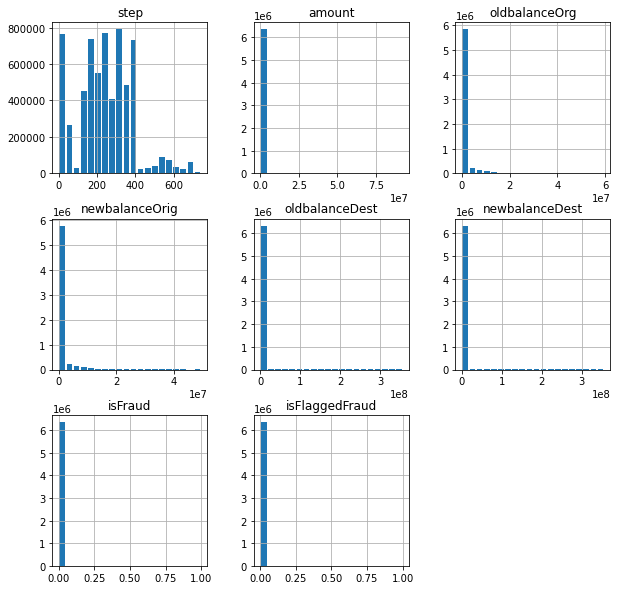

In [87]:
df.hist (bins= 20, figsize = (10,10), rwidth=0.8)

__Correlation__

In [88]:
corr_matrix= df.corr()
corr_matrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


In [89]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [114]:
# Taking only columns with dtypes int or float and converting pandas series to numpy array for correlation.
corr_columns = df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].keys().to_numpy()
corr_columns

array(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig',
       'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype=object)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(df[corr_columns], figsize = (12,8))

___Column 0: step column___

In [7]:
df.step.unique() #Unique values in step column

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [8]:
df.step.value_counts() #checking value counts for step column

19     51352
18     49579
187    49083
235    47491
307    46968
       ...  
432        4
706        4
693        4
112        2
662        2
Name: step, Length: 743, dtype: int64

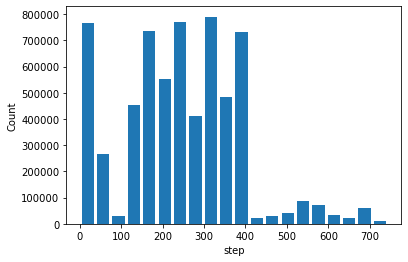

In [9]:
plt.hist(df.step, bins=20, rwidth=0.8)
plt.xlabel('step')
plt.ylabel('Count')
plt.show()

___Column 1 : type column___

In [10]:
df.type.value_counts() # Exploring the type column

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [11]:
dummies = pd.get_dummies(df.type)
dummies.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0


In [12]:
df1 = pd.concat([df,dummies], axis = 'columns')
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,0,0,0,1,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0


__Data Cleaning__

___column: isFraud and isFlaggedFraud column___

In [13]:
df1.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [14]:
df1.isFlaggedFraud.value_counts() 

0    6362604
1         16
Name: isFlaggedFraud, dtype: int64

The following columns will be dropped:

    1. 'type': column converted to dummies.
    2. 'TRANSFER': dropping this column to avoid the dummy variable trap.
    3. nameOrig- contains ID 
    4. nameDest- contains ID 
    5. step - This column does not affect the output. 
    
    

In [15]:
df1 = df1.drop(['type','TRANSFER','nameOrig','nameDest','step','isFlaggedFraud'], axis = 'columns')
df1

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT
0,9839.64,170136.00,160296.36,0.00,0.00,0,0,0,0,1
1,1864.28,21249.00,19384.72,0.00,0.00,0,0,0,0,1
2,181.00,181.00,0.00,0.00,0.00,1,0,0,0,0
3,181.00,181.00,0.00,21182.00,0.00,1,0,1,0,0
4,11668.14,41554.00,29885.86,0.00,0.00,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,0,1,0,0
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,0,0,0,0
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,0,1,0,0
6362618,850002.52,850002.52,0.00,0.00,0.00,1,0,0,0,0


__Initially training a stand alone model using svm. Later Hyperparameter tuning and model selection will be done.__

__Separating X and y:__

In [16]:
X= df1.copy()
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1
2,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0
3,181.00,181.0,0.00,21182.0,0.0,1,0,1,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1


In [17]:
X = X.drop(['isFraud'], axis = 'columns')
X.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT
0,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1
1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1
2,181.00,181.0,0.00,0.0,0.0,0,0,0,0
3,181.00,181.0,0.00,21182.0,0.0,0,1,0,0
4,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1


In [18]:
X.shape

(6362620, 9)

In [19]:
y = df1.isFraud
y.shape

(6362620,)

## Step 1. Solving using Unbalanced Dataset

__Train_test_splitting__

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= 0.2) # (flattened 2d array,1d array)

In [21]:
len(X_train),len(X_test),len(y_train),len(y_test)

(5090096, 1272524, 5090096, 1272524)

__Logistic Regression StandAlone Model__

In [22]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [23]:
import joblib
# joblib.dump(logmodel,'logmodel')
logmodel= joblib.load('logmodel')

In [24]:
logmodel.score(X_test,y_test)

0.9977674291408256

In [25]:
y_pred= logmodel.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [78]:
logmodel.predict_proba(X_test) 
# probablities of fraud happening. 
# Only logistic regression can predict this as it uses sigmoid function.

array([[1.33237487e-001, 8.66762513e-001],
       [1.00000000e+000, 1.25135958e-127],
       [6.78659173e-001, 3.21340827e-001],
       ...,
       [5.65389403e-001, 4.34610597e-001],
       [7.41469304e-001, 2.58530696e-001],
       [1.00000000e+000, 1.13066499e-046]])

In [26]:
np.unique(np.array(y_pred),return_counts= True)

(array([0, 1], dtype=int64), array([1268798,    3726], dtype=int64))

Text(24.0, 0.5, 'True')

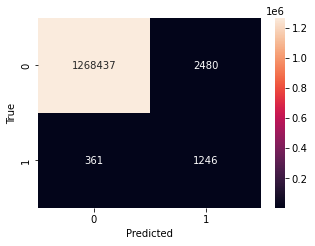

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure (figsize =(5,3.5))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270917
           1       0.33      0.78      0.47      1607

    accuracy                           1.00   1272524
   macro avg       0.67      0.89      0.73   1272524
weighted avg       1.00      1.00      1.00   1272524



## Step 2. Solving using balanced dataset using different balancing methods.

__Balancing the dataset__
    
    Method1: Undersampling
    Method2: Oversampling
    Method3:SMOTE (Synthetic minority oversampling technique) - uses KNN algo
    Method 4: Ensemble method (Majority vote)

**Using Method 2: Oversampling to trade a balance between computational time and accuracy of model**

## METHOD 2: Oversampling

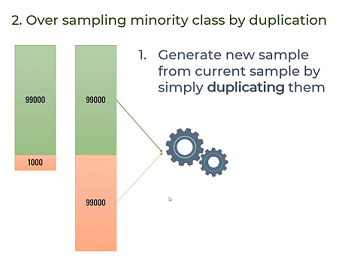

In [29]:
df1.isFraud.unique() #unique values

array([0, 1], dtype=int64)

In [30]:
df1.isFraud.value_counts() #The dataset is highly imbalanced

0    6354407
1       8213
Name: isFraud, dtype: int64

In [31]:
count_class_0,count_class_1 =  df.isFraud.value_counts()

In [32]:
count_class_0

6354407

In [33]:
count_class_1

8213

In [34]:
df_class_0 = df1[df1['isFraud']==0]
df_class_0['isFraud'].value_counts() # Only 1 class i.e. 0 with 5163 no of elements.

0    6354407
Name: isFraud, dtype: int64

In [35]:
df_class_1 = df1[df1['isFraud']==1]
df_class_1['isFraud'].value_counts() # Only 1 class i.e. 0 with 1869 no of elements.

1    8213
Name: isFraud, dtype: int64

In [36]:
df_class_0.shape

(6354407, 10)

In [37]:
df_class_1.shape

(8213, 10)

In [38]:
df_class_1_over = df_class_1.sample(count_class_0, replace = True)
df_class_1_over.shape

(6354407, 10)

In [39]:
df_test_over = pd.concat([df_class_0,df_class_1_over],axis = 0) #Combining the two dataframes 
df_test_over.shape

(12708814, 10)

In [40]:
df_test_over.isFraud.value_counts() # 1 is oversampled. 0 and 1 equally distributed.

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [41]:
df_test_over

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT
0,9839.64,170136.00,160296.36,0.0,0.0,0,0,0,0,1
1,1864.28,21249.00,19384.72,0.0,0.0,0,0,0,0,1
4,11668.14,41554.00,29885.86,0.0,0.0,0,0,0,0,1
5,7817.71,53860.00,46042.29,0.0,0.0,0,0,0,0,1
6,7107.77,183195.00,176087.23,0.0,0.0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
1059644,574709.63,574709.63,0.00,0.0,0.0,1,0,0,0,0
5875183,949979.11,949979.11,0.00,0.0,0.0,1,0,0,0,0
5563737,20393.12,20393.12,0.00,0.0,0.0,1,0,0,0,0
6187830,103053.50,103053.50,0.00,0.0,0.0,1,0,0,0,0


In [42]:
X = df_test_over.drop(['isFraud'],axis = 'columns')
y = df_test_over['isFraud']

In [43]:
X.shape

(12708814, 9)

In [44]:
y.shape

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.


(12708814,)

In [45]:
y.value_counts()

0    6354407
1    6354407
Name: isFraud, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2, stratify = y) 
# stratify ensures equal dist of X and y values while splitting.

In [47]:
def shape_print (X_train,X_test,y_train,y_test):
    list = [X_train,X_test,y_train,y_test]
    list1 = ['X_train','X_test','y_train','y_test']
    for i,j in zip(list,list1):
        print(f'{j} : {i.shape}')

In [48]:
def value_counts(y_train,y_test):
    print (y_train.value_counts())
    print (y_test.value_counts())

In [49]:
shape_print(X_train,X_test,y_train,y_test)

X_train : (10167051, 9)
X_test : (2541763, 9)
y_train : (10167051,)
y_test : (2541763,)


In [50]:
value_counts(y_train,y_test) # When Strat is  used

1    5083526
0    5083525
Name: isFraud, dtype: int64
0    1270882
1    1270881
Name: isFraud, dtype: int64


In [51]:
from sklearn.linear_model import LogisticRegression
logmodel_balanced_OS = LogisticRegression()
logmodel_balanced_OS.fit(X_train,y_train)

LogisticRegression()

In [52]:
logmodel_balanced_OS.score(X_test,y_test) # Accuracy of 82%

0.8213924744360509

In [53]:
y_pred= logmodel_balanced_OS.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 1, 0], dtype=int64)

Text(24.0, 0.5, 'True')

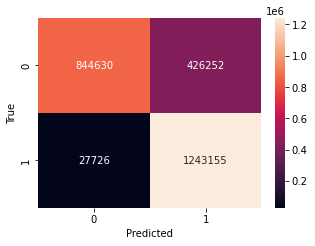

In [54]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure (figsize =(5,3.5))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

In [55]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.66      0.79   1270882
           1       0.74      0.98      0.85   1270881

    accuracy                           0.82   2541763
   macro avg       0.86      0.82      0.82   2541763
weighted avg       0.86      0.82      0.82   2541763



__Cross Validation Score__

In [56]:
from sklearn.model_selection import cross_val_score  # default n_splits= 5.Train test split is not required for C-validation
# scores = cross_val_score(LogisticRegression(),X,y)

In [57]:
import joblib
# joblib.dump(scores,'scores')
scores= joblib.load('scores')

In [58]:
scores

array([0.82132323, 0.82627413, 0.82244057, 0.81943871, 0.81799791])

In [59]:
np.mean(scores)

0.821494908691165

__Hyper Parameter Tuning__

    Using SKLEARN's Grid Search CV to fine tune our model and select the best model and parameters.

In [60]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier

**Hypertuning models with multiple parameters is computationally expensive on CPU.**

**We can tackle this problem in following order of priority:** 
     
     1. Distributed training on GPU by parallel batch training methods.
     2. Randomized search CV (selecting the random combinations of parameters)
     3. Reducing the sample size for training (reducing training samples)

**Now just using Decision tree with parameters ['gini','entropy'] to find the scores with crossvalidation = 3**

In [61]:
model_params = {                           # creating model parameters
     'Decision_Tree_Classifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini','entropy']
        }
    }
}

In [62]:
from sklearn.model_selection import GridSearchCV #takes (estimator, param_grid, cv)

In [63]:
scores = []
for i,j in model_params.items():
    clf = GridSearchCV(j['model'], j['params'],cv =3)
    clf.fit(X,y)
    scores.append({
        'MODEL': i,
        'BEST SCORE': clf.best_score_,
        'BEST PARAMS': clf.best_params_
    })
scores

[{'MODEL': 'Decision_Tree_Classifier',
  'BEST SCORE': 0.9999174588620939,
  'BEST PARAMS': {'criterion': 'entropy'}}]

In [65]:
import joblib                
# joblib.dump(scores,'tuned_scores')
tuned_scores= joblib.load('tuned_scores')
tuned_scores

[{'MODEL': 'Decision_Tree_Classifier',
  'BEST SCORE': 0.9999174588620939,
  'BEST PARAMS': {'criterion': 'entropy'}}]

In [66]:
best_model = pd.DataFrame(tuned_scores) # creating dataframe from the above scores 
best_model

,MODEL,BEST SCORE,BEST PARAMS
0,Decision_Tree_Classifier,0.999917,{'criterion': 'entropy'}


## Step 3. Selecting the best model from hyper parameter tuning scores to train the model.

__Predicting using Decision tree: criterion: 'entropy'__

In [68]:
from sklearn import tree
DTmodel = tree.DecisionTreeClassifier(criterion='entropy')
DTmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [70]:
import joblib                
# joblib.dump(DTmodel,'DT_model')
DT_model= joblib.load('DT_model')
DT_model

DecisionTreeClassifier(criterion='entropy')

In [71]:
DT_model.score(X_test,y_test)

0.9999504281083642

In [72]:
y_pred= DT_model.predict(X_test)
y_pred

array([1, 0, 1, ..., 1, 0, 0], dtype=int64)

Text(24.0, 0.5, 'True')

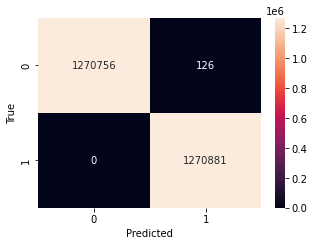

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
import seaborn as sn
plt.figure (figsize =(5,3.5))
sn.heatmap(cm, annot = True,fmt = "d" )
plt.xlabel("Predicted")
plt.ylabel("True")

In [74]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270882
           1       1.00      1.00      1.00   1270881

    accuracy                           1.00   2541763
   macro avg       1.00      1.00      1.00   2541763
weighted avg       1.00      1.00      1.00   2541763



In [75]:
X_test

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,CASH_IN,CASH_OUT,DEBIT,PAYMENT
1070133,1399637.19,1399637.19,0.0,0.00,1399637.19,0,1,0,0
3748952,384688.67,0.00,0.0,820717.27,1205405.94,0,0,0,0
3192962,3139423.35,3139423.35,0.0,2593641.94,5733065.29,0,1,0,0
6020473,104171.37,104171.37,0.0,64407.18,168578.56,0,1,0,0
6027802,49698.72,0.00,0.0,1535186.65,1584885.37,0,1,0,0
...,...,...,...,...,...,...,...,...,...
6264914,346183.99,346183.99,0.0,115683.41,461867.40,0,1,0,0
6272944,58924.16,58924.16,0.0,0.00,0.00,0,0,0,0
1030620,178569.48,178569.48,0.0,263128.53,441698.01,0,1,0,0
4084961,2737.71,1331.28,0.0,0.00,0.00,0,0,0,1


**Entering some random values to predict if fraud is detected using our joblib model.**

In [81]:
DT_model.predict([[123548,1254887,0,8745478,457878,0,1,0,0]]) # Case of fraud happening

array([1], dtype=int64)

In [82]:
DT_model.predict([[0,12514887,0,8745478,457878,1,0,0,0]]) # Case of fraud not happening

array([0], dtype=int64)

**Further pipelines can be created and model can be deployed using flask server**